#**1. Подготовка данных к анализу**

In [ ]:
!gdown --id 

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.options.display.max_rows = 8

dataset_reg = pd.read_excel('region roles (26.05.22).xlsx')

In [21]:
support = 'поддержки'
def sup(val):
  if support in val:
    val = 'Специалист службы поддержки'
  return val
  
dataset_reg['name'] = dataset_reg['name'].apply(sup)

In [22]:
dataset_reg['name'].str.contains('Специалист службы поддержки').value_counts()

False    65445
True      4211
Name: name, dtype: int64

In [23]:
dataset_reg['name'].str.contains('1C').value_counts()

False    68946
True       710
Name: name, dtype: int64

In [24]:
fed_okr = {'Белгородская область':'Центральный федеральный округ', 'Брянская область':'Центральный федеральный округ', 'Владимирская область':'Центральный федеральный округ', 'Воронежская область':'Центральный федеральный округ', 'Ивановская область':'Центральный федеральный округ', 'Калужская область':'Центральный федеральный округ', 'Костромская область':'Центральный федеральный округ', 'Курская область':'Центральный федеральный округ', 'Липецкая область':'Центральный федеральный округ', 'Московская область':'Центральный федеральный округ', 'Орловская область':'Центральный федеральный округ', 'Рязанская область':'Центральный федеральный округ', 'Смоленская область':'Центральный федеральный округ', 'Тамбовская область':'Центральный федеральный округ', 'Тверская область':'Центральный федеральный округ', 'Тульская область':'Центральный федеральный округ', 'Ярославская область':'Центральный федеральный округ', 'Москва':'Центральный федеральный округ','Республика Карелия':'Северо-Западный федеральный округ', 'Республика Коми':'Северо-Западный федеральный округ', 'Архангельская область':'Северо-Западный федеральный округ', 'Вологодская область':'Северо-Западный федеральный округ', 'Калининградская область':'Северо-Западный федеральный округ', 'Ленинградская область':'Северо-Западный федеральный округ', 'Мурманская область':'Северо-Западный федеральный округ', 'Новгородская область':'Северо-Западный федеральный округ', 'Псковская область':'Северо-Западный федеральный округ', 'Санкт-Петербург':'Северо-Западный федеральный округ', 'Ненецкий АО':'Северо-Западный федеральный округ', 'Республика Адыгея':'Южный федеральный округ', 'Республика Калмыкия':'Южный федеральный округ', 'Республика Крым':'Южный федеральный округ', 'Краснодарский край':'Южный федеральный округ', 'Астраханская область':'Южный федеральный округ', 'Волгоградская область':'Южный федеральный округ', 'Ростовская область':'Южный федеральный округ', 'Севастополь':'Южный федеральный округ', 'Республика Дагестан':'Северо-Кавказский федеральный округ', 'Республика Ингушетия':'Северо-Кавказский федеральный округ', 'Кабардино-Балкарская республика':'Северо-Кавказский федеральный округ', 'Карачаево-Черкесская Республика':'Северо-Кавказский федеральный округ', 'Республика Северная Осетия-Алания':'Северо-Кавказский федеральный округ', 'Чеченская республика':'Северо-Кавказский федеральный округ', 'Ставропольский край':'Северо-Кавказский федеральный округ', 'Республика Башкортостан':'Приволжский федеральный округ', 'Республика Марий Эл':'Приволжский федеральный округ', 'Республика Мордовия':'Приволжский федеральный округ', 'Республика Татарстан':'Приволжский федеральный округ', 'Удмуртская Республика':'Приволжский федеральный округ', 'Чувашская Республика':'Приволжский федеральный округ', 'Пермский край':'Приволжский федеральный округ', 'Кировская область':'Приволжский федеральный округ', 'Нижегородская область':'Приволжский федеральный округ', 'Оренбургская область':'Приволжский федеральный округ', 'Пензенская область':'Приволжский федеральный округ', 'Самарская область':'Приволжский федеральный округ', 'Саратовская область':'Приволжский федеральный округ', 'Ульяновская область':'Приволжский федеральный округ','Курганская область':'Уральский федеральный округ', 'Свердловская область':'Уральский федеральный округ', 'Тюменская область':'Уральский федеральный округ', 'Челябинская область':'Уральский федеральный округ', 'Ханты-Мансийский АО - Югра':'Уральский федеральный округ', 'Ямало-Ненецкий АО':'Уральский федеральный округ','Республика Алтай':'Сибирский федеральный округ', 'Республика Тыва':'Сибирский федеральный округ', 'Республика Хакасия':'Сибирский федеральный округ', 'Алтайский край':'Сибирский федеральный округ', 'Красноярский край':'Сибирский федеральный округ', 'Иркутская область':'Сибирский федеральный округ', 'Кемеровская область':'Сибирский федеральный округ', 'Новосибирская область':'Сибирский федеральный округ', 'Омская область':'Сибирский федеральный округ', 'Томская область':'Сибирский федеральный округ','Республика Бурятия':'Дальневосточный федеральный округ', 'Республика Саха (Якутия)':'Дальневосточный федеральный округ', 'Забайкальский край':'Дальневосточный федеральный округ', 'Камчатский край':'Дальневосточный федеральный округ', 'Приморский край':'Дальневосточный федеральный округ', 'Хабаровский край':'Дальневосточный федеральный округ', 'Амурская область':'Дальневосточный федеральный округ', 'Магаданская область':'Дальневосточный федеральный округ', 'Сахалинская область':'Дальневосточный федеральный округ', 'Еврейская АО':'Дальневосточный федеральный округ', 'Чукотский АО':'Дальневосточный федеральный округ'}

In [25]:
dataset_reg['Федеральный округ'] = dataset_reg['region'].map(fed_okr)

In [26]:
# проверка датасета на дубликаты
dataset_reg.isna().sum()

Unnamed: 0                    0
id                            0
premium                       0
name                          0
                          ...  
specializations               0
region                        0
immediate_redirect_url    69655
Федеральный округ             0
Length: 35, dtype: int64

In [27]:
# количество дубликатов
dataset_reg.isna().sum().sum()

438439

In [28]:
# очистка датасета от дубликатов
dataset = dataset_reg.drop_duplicates(subset = ['id'], keep='last')

In [29]:
df_1 = dataset.apply(lambda x: x.replace({'1 С':'1C', '1С':'1C', '1 C': '1C', '1c': '1C', '1 c': '1C', '1 с':'1C', '1с':'1C', "1С": "1C", 'python': 'Python', 'python 3': 'Python', 'sql':'SQL', 'git':'GIT', 'Git':'GIT'}, regex=True))

In [30]:
df_1['name'] = df_1['name'].replace({'1C': 'Программист 1C', 'Ведущий программист 1C': 'Программист 1C', 'Ведущий программист 1С': 'Программист 1C', 'Аналитик 1C': 'Программист 1C', 'Разработчик 1C': 'Программист 1C', 'Дизайнер': 'Графический дизайнер', 'Инженер-программист 1C': 'Программист 1C', "Консультант 1C":"Программист 1C"})

In [31]:
import json
def text_to_json(text):
  try:
    return json.loads(text.replace('"', '').replace("'", '"'))
  except:
    return []
df_1['key_skills_json'] = df_1['key_skills'].apply(text_to_json)

In [32]:
def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['name'])
    return out
  except:
    return []
df_1['Ключевые скилллы'] = df_1['key_skills_json'].apply(get_values)

In [33]:
df_1['Ключевые скилллы']

0                                                       []
1                        [GIT, SQL, Тестирование, C#, API]
2        [SQL, Linux, Информационная безопасность, Рабо...
3        [Пользователь ПК, Работа в команде, 1C: Предпр...
                               ...                        
69652    [1C: Управление Торговлей, 1C: Предприятие 8, ...
69653    [Организаторские навыки, Работа в команде, Упр...
69654                                                   []
69655    [Информационная безопасность, Аудит безопаснос...
Name: Ключевые скилллы, Length: 69423, dtype: object

In [34]:
def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['name'])
    return out
  except:
    return []
df_1['key_skills_list'] = df_1['key_skills_json'].apply(get_values)

In [35]:
def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['name'])
    return out
  except:
    return []
df_1['Ключевые навыки'] = df_1['key_skills_json'].apply(get_values)

In [36]:
df_1['salary_json'] = df_1['salary'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['from']
  except:
    return None
df_1['Минимальная зарплата'] = df_1['salary_json'].apply(get_values)

In [37]:
import json
def text_to_json(text):
  try:
    return json.loads(text.replace('"', '').replace("'", '"'))
  except:
    return []
df_1['specializations_json'] = df_1['specializations'].apply(text_to_json)

In [38]:
def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['name'])
    return out
  except:
    return []
df_1['specializations_list'] = df_1['specializations_json'].apply(get_values)

In [39]:
def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['id'])
    return out
  except:
    return []
df_1['id_list'] = df_1['specializations_json'].apply(get_values)

In [40]:
def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['profarea_name'])
    return out
  except:
    return []
df_1['profareaname_list'] = df_1['specializations_json'].apply(get_values)

In [41]:
df_1['experience_json'] = df_1['experience'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['name']
  except:
    return None
df_1['Опыт работы'] = df_1['experience_json'].apply(get_values)

In [42]:
df_1['schedule_json'] = df_1['schedule'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['name']
  except:
    return None
df_1['График работы'] = df_1['schedule_json'].apply(get_values)

In [43]:
df_1['area_json'] = df_1['area'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['name']
  except:
    return None
df_1['Город вакансии'] = df_1['area_json'].apply(get_values)

In [44]:
df_1['specializations_list'] = df_1['specializations_list'].replace({'Арт директор':'Арт-директор'})

In [45]:
df_1['salary_json'] = df_1['salary'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['to']
  except:
    return None
df_1['Максимальная зарплата'] = df_1['salary_json'].apply(get_values)

In [46]:
df_1['salary_json'] = df_1['salary'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['currency']
  except:
    return None
df_1['Валюта'] = df_1['salary_json'].apply(get_values)

In [47]:
df_1['salary_json'] = df_1['salary'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['gross']
  except:
    return None
df_1['НДФЛ'] = df_1['salary_json'].apply(get_values)

In [48]:
skills = df_1['key_skills_list']

In [49]:
def get_number_of_elements(skills):
    count = 0
    for element in skills:
        count += 1
    return count

In [50]:
df_1['Количество скиллов'] = skills.apply(get_number_of_elements)

In [51]:
clear_ndfl = df_1['НДФЛ'].replace({False: 1, True: 0.87})

In [52]:
df_1['Чистый НДФЛ'] = clear_ndfl

In [53]:
rates = dict(RUR=1, USD=53, EUR=56, KZT=0.12)
df_1['Минимальная ЗП в рублях'] = df_1['Валюта'].map(rates)*df_1['Минимальная зарплата']*df_1['Чистый НДФЛ']

In [54]:
df_1['Максимальная ЗП в рублях'] = df_1['Валюта'].map(rates)*df_1['Максимальная зарплата']*df_1['Чистый НДФЛ']

In [55]:
df_1['Средняя ЗП в рублях'] = df_1[['Минимальная ЗП в рублях', 'Максимальная ЗП в рублях']].mean(axis=1)

In [56]:
df_2 = df_1[df_1['Средняя ЗП в рублях'].notna()]

In [57]:
dff = df_2[df_2['specializations'].str.contains("Информационные технологии", na=False)]

In [58]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22646 entries, 1 to 69654
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                22646 non-null  int64  
 1   id                        22646 non-null  int64  
 2   premium                   22646 non-null  bool   
 3   name                      22646 non-null  object 
 4   department                611 non-null    object 
 5   has_test                  22646 non-null  bool   
 6   response_letter_required  22646 non-null  bool   
 7   area                      22646 non-null  object 
 8   salary                    22646 non-null  object 
 9   type                      22646 non-null  object 
 10  address                   13043 non-null  object 
 11  response_url              0 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              22646 non-null  object 
 14  create

#**2. Типы анализируемых данных**

Типы анализируемых данных:
- name (наименование вакансии) - категориальный тип
- Средняя ЗП в рублях - количественный тип
- Опыт работы - категориальный тип
- Город вакансии - категориальный тип
- Федеральный округ - категориальный тип
- количество скиллов - количественный тип
- key_skills_list (ключевые навыки) - категориальный тип

In [59]:
df_stat = dff[['name', 'Средняя ЗП в рублях', 'Опыт работы', 'Город вакансии', 'Федеральный округ', 'График работы', 'Количество скиллов', 'key_skills_list', 'Ключевые навыки']].dropna()

In [60]:
df_stat_expl = df_stat.explode('key_skills_list')

#**3. Визуализация данных в соответствии с их типом**

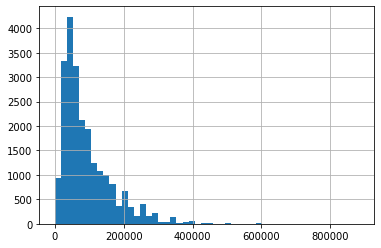

In [61]:
df_stat['Средняя ЗП в рублях'].hist(bins=50)

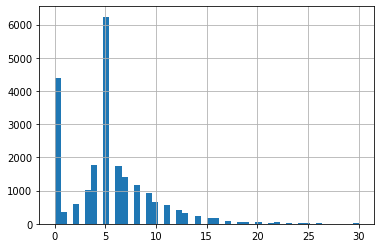

In [62]:
df_stat['Количество скиллов'].hist(bins=50)

In [63]:
df_stat_2 = df_stat.loc[(df_stat['Количество скиллов'] >0)]

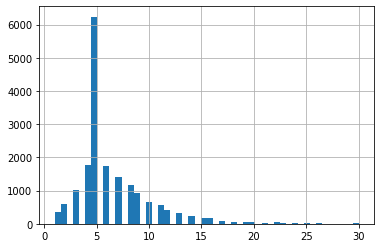

In [64]:
df_stat_2['Количество скиллов'].hist(bins=50)

In [65]:
city_count = df_stat['Город вакансии'].value_counts()
city_count[:7]

Москва             4857
Санкт-Петербург    2389
Екатеринбург        890
Новосибирск         872
Краснодар           602
Казань              598
Нижний Новгород     521
Name: Город вакансии, dtype: int64

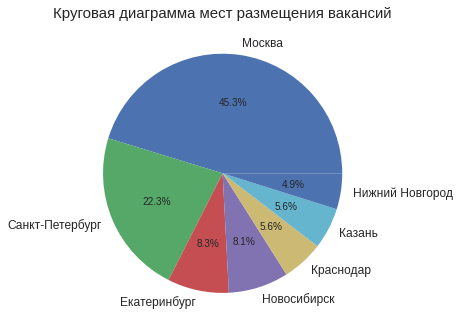

In [66]:
plt.style.use('seaborn')
params = {
          'axes.titlesize': 15,  
          'xtick.labelsize': 12, 
          'axes.labelsize': 16   
          }
plt.rcParams.update(params)
plt.pie(city_count[:7].values, labels = city_count[:7].index, autopct='%1.1f%%')
plt.title('Круговая диаграмма мест размещения вакансий')
plt.show()

In [67]:
fo_count = df_stat['Федеральный округ'].value_counts()
fo_count[:7]

Центральный федеральный округ        7872
Приволжский федеральный округ        3854
Северо-Западный федеральный округ    3006
Сибирский федеральный округ          2798
Южный федеральный округ              2020
Уральский федеральный округ          1911
Дальневосточный федеральный округ     909
Name: Федеральный округ, dtype: int64

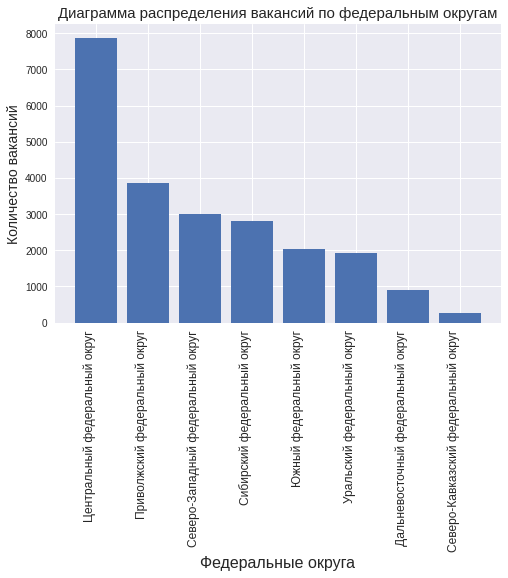

In [68]:
plt.bar(fo_count[:10].index, fo_count[:10].values)
plt.title('Диаграмма распределения вакансий по федеральным округам')
plt.xlabel('Федеральные округа', fontsize=16)
plt.ylabel('Количество вакансий', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.show()

In [69]:
vac_count = df_stat['name'].value_counts()

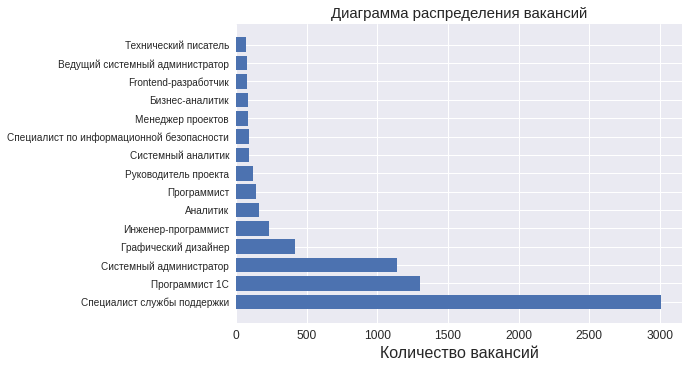

In [70]:
plt.title('Диаграмма распределения вакансий')
plt.xlabel('Количество вакансий')
plt.barh(vac_count[:15].index, vac_count[:15].values)
plt.show()

In [71]:
exper_count = df_stat['Опыт работы'].value_counts()

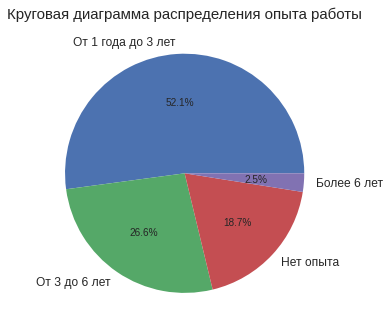

In [72]:
plt.style.use('seaborn')
params = {
          'axes.titlesize': 15,  
          'xtick.labelsize': 12, 
          'axes.labelsize': 16   
          }
plt.rcParams.update(params)
plt.pie(exper_count[:7].values, labels = exper_count[:7].index, autopct='%1.1f%%')
plt.title('Круговая диаграмма распределения опыта работы')
plt.show()

In [73]:
wtime_count = df_stat['График работы'].value_counts()

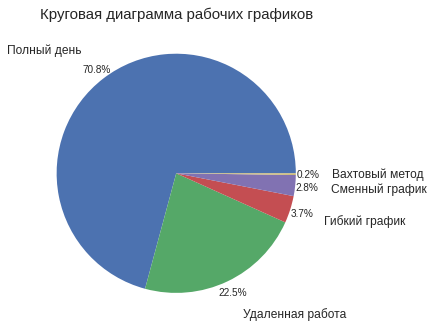

In [74]:
plt.style.use('seaborn')
params = {
          'axes.titlesize': 15,  
          'xtick.labelsize': 12, 
          'axes.labelsize': 16   
          }
plt.rcParams.update(params)
plt.pie(wtime_count[:7].values, labels = wtime_count[:7].index, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.3)
plt.title('Круговая диаграмма рабочих графиков')
plt.show()

In [75]:
top_it_skills = df_stat_expl['key_skills_list'].value_counts()
top_it_skills[:48]

Работа в команде               2056
GIT                            1955
SQL                            1872
Linux                          1784
                               ... 
Деловая коммуникация            571
Информационная безопасность     515
C#                              503
Docker                          494
Name: key_skills_list, Length: 48, dtype: int64

In [76]:
df_stat_expl['key_skills_list'].str.contains('SQL').value_counts()

False    116369
True       5253
Name: key_skills_list, dtype: int64

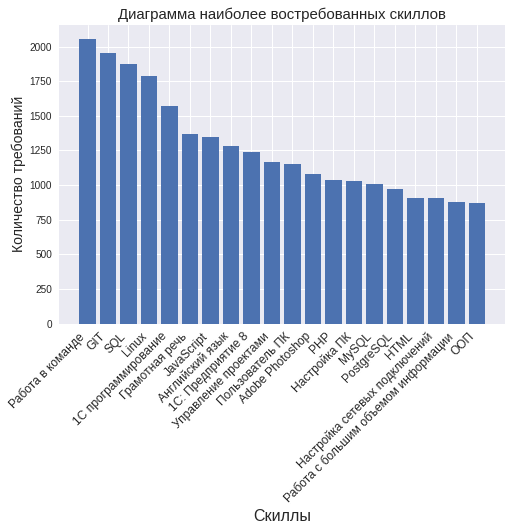

In [77]:
plt.bar(top_it_skills[:20].index, top_it_skills[:20].values)
plt.title('Диаграмма наиболее востребованных скиллов')
plt.xlabel('Скиллы', fontsize=16)
plt.ylabel('Количество требований', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

#**4. Проверка гипотез о нормальности распределения количественных показателей**

In [78]:
df_stat['Средняя ЗП в рублях'].describe().astype(int)

count     22646
mean      93074
std       73838
min          30
25%       40020
50%       70000
75%      121800
max      883050
Name: Средняя ЗП в рублях, dtype: int64

In [79]:
# коэффициент ассиметрии
df_stat['Средняя ЗП в рублях'].skew()

1.938790882090453

In [80]:
# коэффициент эксцесса
df_stat['Средняя ЗП в рублях'].kurtosis()

6.107875486546108

In [81]:
# Тест Д'Агостино для средней заработной платы
stats.normaltest(df_stat['Средняя ЗП в рублях'])

NormaltestResult(statistic=9326.623430066764, pvalue=0.0)

In [82]:
df_stat['Количество скиллов'].describe().astype(int)

count    22646
mean         5
std          4
min          0
25%          3
50%          5
75%          7
max         30
Name: Количество скиллов, dtype: int64

In [83]:
df_stat['Количество скиллов'].skew()

1.2987100845416177

In [84]:
df_stat['Количество скиллов'].kurtosis()

3.4356175132603566

In [85]:
stats.normaltest(df_stat['Количество скиллов'])

NormaltestResult(statistic=5711.286290185006, pvalue=0.0)

Обе выбобрки количественных показателей в соотвествии с тестом Д'Агостино не подчиняются нормальному закону распределения. Что также заметно по показателям ассиметрии и эксцесса.

#**5. Оценка связи между показателями**

##5.1 Оценка связи количественных показателей: средней заработной платы и количества скиллов

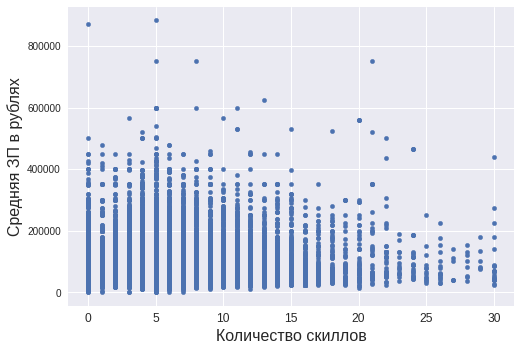

In [86]:
df_stat.plot('Количество скиллов', 'Средняя ЗП в рублях', kind="scatter")

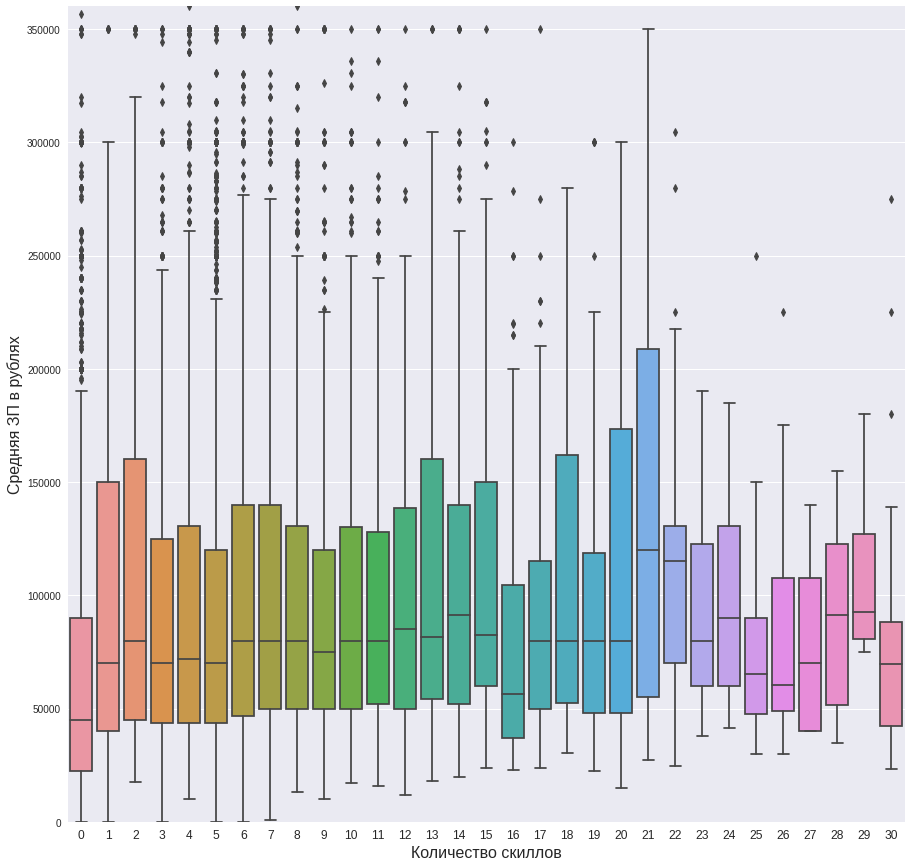

In [87]:
f, ax = plt.subplots(figsize=(15, 15))
plt.axis(ymin=0, ymax=360000)
fig = sns.boxplot(x='Количество скиллов', y='Средняя ЗП в рублях', data=df_stat)

In [88]:
df_stat[['Количество скиллов','Средняя ЗП в рублях']].corr()

,Количество скиллов,Средняя ЗП в рублях
Количество скиллов,1.000000,0.132629
Средняя ЗП в рублях,0.132629,1.000000


In [89]:
scipy.stats.pearsonr(df_stat['Количество скиллов'],df_stat['Средняя ЗП в рублях'])

(0.13262886260999834, 2.175059679404918e-89)

In [90]:
skill_0_5 = df_stat[df_stat['Количество скиллов'] < 6]
skill_5_30 = df_stat[df_stat['Количество скиллов'] > 4]

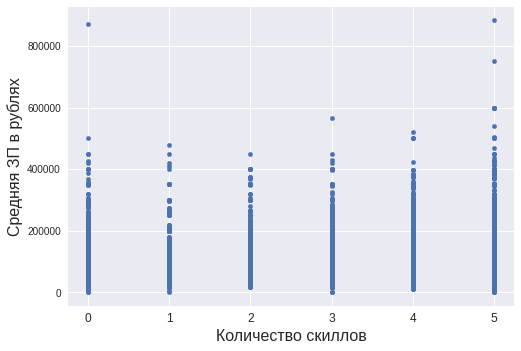

In [91]:
skill_0_5.plot('Количество скиллов', 'Средняя ЗП в рублях', kind="scatter")

In [92]:
skill_0_5[['Количество скиллов', 'Средняя ЗП в рублях']].corr()

,Количество скиллов,Средняя ЗП в рублях
Количество скиллов,1.000000,0.148116
Средняя ЗП в рублях,0.148116,1.000000


In [93]:
scipy.stats.pearsonr(skill_0_5['Количество скиллов'], skill_0_5['Средняя ЗП в рублях'])

(0.14811588314585739, 3.0612200548930803e-71)

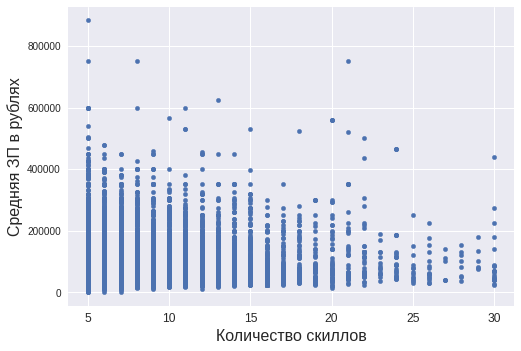

In [94]:
skill_5_30.plot('Количество скиллов', 'Средняя ЗП в рублях', kind="scatter")

In [95]:
skill_5_30[['Количество скиллов', 'Средняя ЗП в рублях']].corr()

,Количество скиллов,Средняя ЗП в рублях
Количество скиллов,1.000000,0.057308
Средняя ЗП в рублях,0.057308,1.000000


In [96]:
scipy.stats.pearsonr(skill_5_30['Количество скиллов'], skill_5_30['Средняя ЗП в рублях'])

(0.0573075112977372, 4.794458224008703e-12)

#**6. Сравнение групп**

##6.1 Сравнение заработной платы ИТ-специалистов в зависимости от графика работы

In [97]:
df_stat.groupby('График работы')[['Средняя ЗП в рублях']].mean()

,Средняя ЗП в рублях
График работы,
Вахтовый метод,117232.588235
Гибкий график,113287.855950
Полный день,88159.389125
Сменный график,48043.123760
Удаленная работа,110689.041273


In [98]:
df_2.groupby('График работы')[['Средняя ЗП в рублях']].mean()

,Средняя ЗП в рублях
График работы,
Вахтовый метод,101916.627119
Гибкий график,107674.275884
Полный день,89461.399080
Сменный график,53713.475481
Удаленная работа,106007.747141


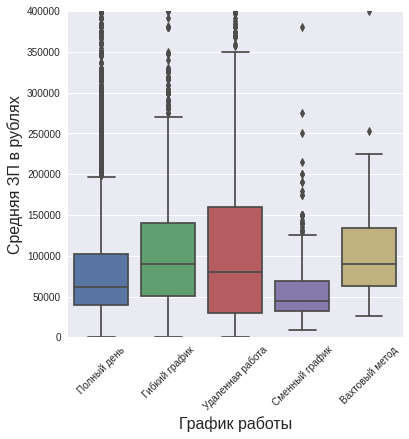

In [99]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='График работы', y='Средняя ЗП в рублях', data=df_2)
plt.xticks(fontsize = 10, rotation = 45) # поворот подписи на 90 градусов
plt.axis(ymin=0, ymax=400000)
plt.show()

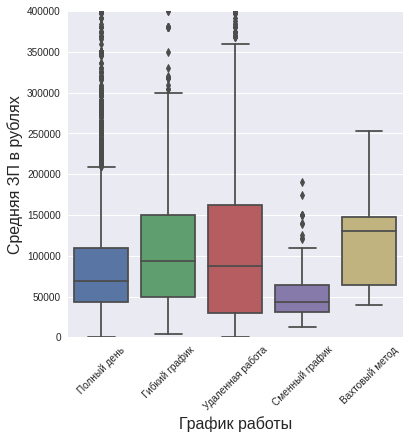

In [100]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='График работы', y='Средняя ЗП в рублях', data=df_stat)
plt.xticks(fontsize = 10, rotation = 45) # поворот подписи на 90 градусов
plt.axis(ymin=0, ymax=400000)
plt.show()

In [101]:
schd1=np.array(df_stat[df_stat['График работы']=='Сменный график']['Средняя ЗП в рублях'])
schd2=np.array(df_stat[df_stat['График работы']=='Полный день']['Средняя ЗП в рублях'])
schd3=np.array(df_stat[df_stat['График работы']=='Гибкий график']['Средняя ЗП в рублях'])
schd4=np.array(df_stat[df_stat['График работы']=='Удаленная работа']['Средняя ЗП в рублях'])
schd5=np.array(df_stat[df_stat['График работы']=='Вахтовый метод']['Средняя ЗП в рублях'])
stats.mstats.kruskalwallis(schd1,schd2,schd3,schd4,schd5)

KruskalResult(statistic=430.6286761320107, pvalue=6.687386285750563e-92)

In [102]:
schd1=np.array(df_2[df_2['График работы']=='Сменный график']['Средняя ЗП в рублях'])
schd2=np.array(df_2[df_2['График работы']=='Полный день']['Средняя ЗП в рублях'])
schd3=np.array(df_2[df_2['График работы']=='Гибкий график']['Средняя ЗП в рублях'])
schd4=np.array(df_2[df_2['График работы']=='Удаленная работа']['Средняя ЗП в рублях'])
schd5=np.array(df_2[df_2['График работы']=='Вахтовый метод']['Средняя ЗП в рублях'])
stats.mstats.kruskalwallis(schd1,schd2,schd3,schd4,schd5)

KruskalResult(statistic=595.6461236782582, pvalue=1.3567560632707225e-127)

Гипотеза H0 об отсутствии связи между графиком работы и средней зп отвергается как по всей совокупности данных о вакансиях, так и по данным об ИТ-специалистах.

##6.2 Сравнение заработной платы ИТ-специалистов в зависимости от опыта работы

In [103]:
df_stat.groupby('Опыт работы')[['Средняя ЗП в рублях']].mean()

,Средняя ЗП в рублях
Опыт работы,
Более 6 лет,179184.712212
Нет опыта,38927.137112
От 1 года до 3 лет,83145.219650
От 3 до 6 лет,142537.804615


In [104]:
df_2.groupby('Опыт работы')[['Средняя ЗП в рублях']].mean()

,Средняя ЗП в рублях
Опыт работы,
Более 6 лет,159576.539321
Нет опыта,83939.741745
От 1 года до 3 лет,78778.251490
От 3 до 6 лет,127716.364912


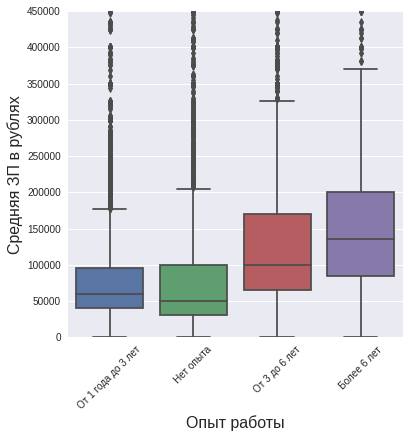

In [105]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Опыт работы', y='Средняя ЗП в рублях', data=df_2)
plt.xticks(fontsize = 10, rotation = 45) # поворот подписи на 90 градусов
plt.axis(ymin=0, ymax=450000)
plt.show()

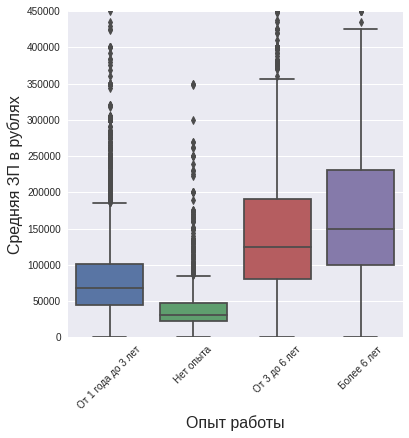

In [106]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Опыт работы', y='Средняя ЗП в рублях', data=df_stat)
plt.xticks(fontsize = 10, rotation = 45) # поворот подписи на 90 градусов
plt.axis(ymin=0, ymax=450000)
plt.show()

In [107]:
dfd1=np.array(df_2[df_2['Опыт работы']=='От 1 года до 3 лет']['Средняя ЗП в рублях'])
dfd2=np.array(df_2[df_2['Опыт работы']=='Нет опыта']['Средняя ЗП в рублях'])
dfd3=np.array(df_2[df_2['Опыт работы']=='От 3 до 6 лет']['Средняя ЗП в рублях'])
dfd4=np.array(df_2[df_2['Опыт работы']=='Более 6 лет']['Средняя ЗП в рублях'])
stats.mstats.kruskalwallis(dfd1,dfd2,dfd3,dfd4)

KruskalResult(statistic=4304.691029281081, pvalue=0.0)

In [108]:
dfd1=np.array(df_stat[df_stat['Опыт работы']=='От 1 года до 3 лет']['Средняя ЗП в рублях'])
dfd2=np.array(df_stat[df_stat['Опыт работы']=='Нет опыта']['Средняя ЗП в рублях'])
dfd3=np.array(df_stat[df_stat['Опыт работы']=='От 3 до 6 лет']['Средняя ЗП в рублях'])
dfd4=np.array(df_stat[df_stat['Опыт работы']=='Более 6 лет']['Средняя ЗП в рублях'])
stats.mstats.kruskalwallis(dfd1,dfd2,dfd3,dfd4)

KruskalResult(statistic=7883.599928917098, pvalue=0.0)

Гипотеза H0 об отсутствии связи между опытом работы и средней зп отвергается как по всей совокупности данных о вакансиях, так и по данным об ИТ-специалистах.

##6.3 Сравнение заработной платы ИТ-специалистов в зависимости от федерального округа, в котором предлагается работа

In [109]:
df_stat.groupby('Федеральный округ')[['Средняя ЗП в рублях']].mean()

,Средняя ЗП в рублях
Федеральный округ,
Дальневосточный федеральный округ,62689.468663
Приволжский федеральный округ,76434.853036
Северо-Западный федеральный округ,107279.379686
Северо-Кавказский федеральный округ,48945.206522
Сибирский федеральный округ,85424.970407
Уральский федеральный округ,81020.561554
Центральный федеральный округ,110874.052712
Южный федеральный округ,76018.931423


In [110]:
df_2.groupby('Федеральный округ')[['Средняя ЗП в рублях']].mean()

,Средняя ЗП в рублях
Федеральный округ,
Дальневосточный федеральный округ,65418.824864
Приволжский федеральный округ,70804.847126
Северо-Западный федеральный округ,97784.142238
Северо-Кавказский федеральный округ,49613.910417
Сибирский федеральный округ,75639.512797
Уральский федеральный округ,74872.735384
Центральный федеральный округ,103094.692455
Южный федеральный округ,125966.385290


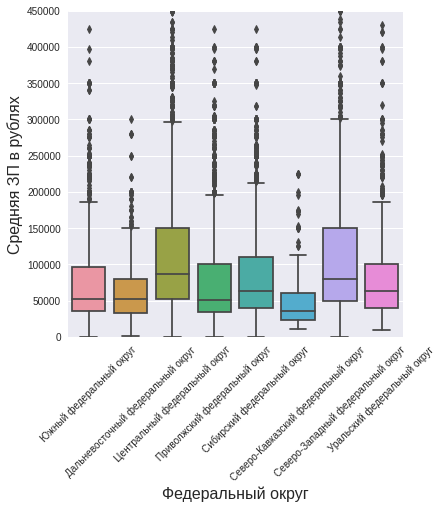

In [111]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Федеральный округ', y='Средняя ЗП в рублях', data=df_stat)
plt.xticks(fontsize = 10, rotation = 45) # поворот подписи на 90 градусов
plt.axis(ymin=0, ymax=450000)
plt.show()

In [112]:
dfd1=np.array(df_2[df_2['Федеральный округ']=='Южный федеральный округ']['Средняя ЗП в рублях'])
dfd2=np.array(df_2[df_2['Федеральный округ']=='Дальневосточный федеральный округ']['Средняя ЗП в рублях'])
dfd3=np.array(df_2[df_2['Федеральный округ']=='Центральный федеральный округ']['Средняя ЗП в рублях'])
dfd4=np.array(df_2[df_2['Федеральный округ']=='Приволжский федеральный округ']['Средняя ЗП в рублях'])
dfd5=np.array(df_2[df_2['Федеральный округ']=='Сибирский федеральный округ']['Средняя ЗП в рублях'])
dfd6=np.array(df_2[df_2['Федеральный округ']=='Северо-кавказский федеральный округ']['Средняя ЗП в рублях'])
dfd7=np.array(df_2[df_2['Федеральный округ']=='Северо-Западный федеральный округ']['Средняя ЗП в рублях'])
dfd8=np.array(df_2[df_2['Федеральный округ']=='Уральский федеральный округ']['Средняя ЗП в рублях'])
stats.mstats.kruskalwallis(dfd1,dfd2,dfd3,dfd4,dfd5,dfd6,dfd7,dfd8)

KruskalResult(statistic=1942.1589627645276, pvalue=0.0)

In [113]:
dfd1=np.array(df_stat[df_stat['Федеральный округ']=='Южный федеральный округ']['Средняя ЗП в рублях'])
dfd2=np.array(df_stat[df_stat['Федеральный округ']=='Дальневосточный федеральный округ']['Средняя ЗП в рублях'])
dfd3=np.array(df_stat[df_stat['Федеральный округ']=='Центральный федеральный округ']['Средняя ЗП в рублях'])
dfd4=np.array(df_stat[df_stat['Федеральный округ']=='Приволжский федеральный округ']['Средняя ЗП в рублях'])
dfd5=np.array(df_stat[df_stat['Федеральный округ']=='Сибирский федеральный округ']['Средняя ЗП в рублях'])
dfd6=np.array(df_stat[df_stat['Федеральный округ']=='Северо-кавказский федеральный округ']['Средняя ЗП в рублях'])
dfd7=np.array(df_stat[df_stat['Федеральный округ']=='Северо-Западный федеральный округ']['Средняя ЗП в рублях'])
dfd8=np.array(df_stat[df_stat['Федеральный округ']=='Уральский федеральный округ']['Средняя ЗП в рублях'])
stats.mstats.kruskalwallis(dfd1,dfd2,dfd3,dfd4,dfd5,dfd6,dfd7,dfd8)

KruskalResult(statistic=1458.8880173019093, pvalue=6.980472684574e-311)

Гипотеза H0 об отсутствии связи между федеральным округом, в котором предлагается работа, и средней зп отвергается как по всей совокупности данных о вакансиях, так и по данным об ИТ-специалистах.

#**7. Проверка гипотез**

Н0: Опыт работы не влияет на заработную плату специалиста\
Н1: Опыт работы влияет на размер заработной платы специалиста

In [114]:
clear_exp = df_stat['Опыт работы'].replace({'Нет опыта': 0, 'От 1 года до 3 лет': 1, 'От 3 до 6 лет': 1, 'Более 6 лет':1})

In [115]:
df_stat['Чистый опыт'] = clear_exp

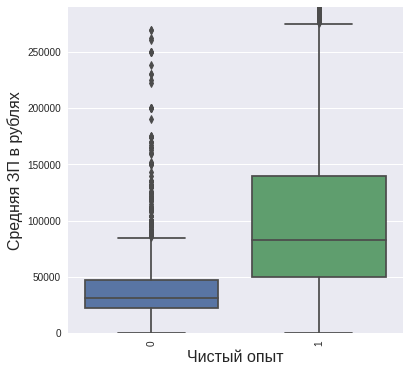

In [116]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Чистый опыт', y='Средняя ЗП в рублях', data=df_stat)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.axis(ymin=0, ymax=290000)
plt.show()

In [134]:
fl_0 = df_stat[df_stat['Чистый опыт']==0]
fl_1 = df_stat[df_stat['Чистый опыт']==1]
scipy.stats.mannwhitneyu(fl_0['Средняя ЗП в рублях'],fl_1['Средняя ЗП в рублях'])

MannwhitneyuResult(statistic=11109926.0, pvalue=0.0)

Таким образом, Н0 откланяется, т.е. между показателями существует связь, т.е. опыт работы влияет на размер заработной платы специалиста.

#**8. Регрессионная модель**

In [118]:
df_regr = df_stat[['Чистый опыт','Средняя ЗП в рублях','Федеральный округ', 'Количество скиллов']]

In [119]:
# ранжируем федеральные округа в соответствии со средней заработной платой

cleanup_nums = {'Федеральный округ':
      {'Южный федеральный округ': 3, 
       'Дальневосточный федеральный округ':2,
       'Центральный федеральный округ':8, 
       'Приволжский федеральный округ':4,
       'Сибирский федеральный округ':6,
       'Северо-Кавказский федеральный округ':1,
       'Северо-Западный федеральный округ':7, 'Уральский федеральный округ':5}}

In [120]:
df_regr = df_regr.replace(cleanup_nums)

In [121]:
df_regr.corr(method='pearson')

,Чистый опыт,Средняя ЗП в рублях,Федеральный округ,Количество скиллов
Чистый опыт,1.000000,0.352175,0.136031,0.178040
Средняя ЗП в рублях,0.352175,1.000000,0.223105,0.132629
Федеральный округ,0.136031,0.223105,1.000000,0.070763
Количество скиллов,0.178040,0.132629,0.070763,1.000000


In [122]:
df_regr.corr(method='kendall')

,Чистый опыт,Средняя ЗП в рублях,Федеральный округ,Количество скиллов
Чистый опыт,1.000000,0.397512,0.113993,0.169602
Средняя ЗП в рублях,0.397512,1.000000,0.190545,0.141104
Федеральный округ,0.113993,0.190545,1.000000,0.053980
Количество скиллов,0.169602,0.141104,0.053980,1.000000


In [123]:
df_regr_1 = pd.concat((df_regr,pd.get_dummies(df_regr['Федеральный округ'], prefix="d", prefix_sep='',)),1)

<ipython-input-123-e43e66d09243>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df_regr_1 = pd.concat((df_regr,pd.get_dummies(df_regr['Федеральный округ'], prefix="d", prefix_sep='',)),1)


In [124]:
df_regr_1

,Чистый опыт,Средняя ЗП в рублях,Федеральный округ,Количество скиллов,d1,d2,d3,d4,d5,d6,d7,d8
1,1,32625.0,3,5,0,0,1,0,0,0,0,0
3,0,22620.0,3,5,0,0,1,0,0,0,0,0
4,0,20000.0,3,8,0,0,1,0,0,0,0,0
5,0,17500.0,3,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69649,1,250000.0,8,5,0,0,0,0,0,0,0,1
69652,1,130000.0,8,5,0,0,0,0,0,0,0,1
69653,1,50000.0,8,7,0,0,0,0,0,0,0,1
69654,1,85000.0,8,0,0,0,0,0,0,0,0,1


In [125]:
df_regr_2 = df_regr_1.rename(columns = {'Средняя ЗП в рублях':'AvgSal','Чистый опыт':'EXP','Федеральный округ':'FO', 'Количество скиллов':'Qskills'}) 

In [126]:
df_regr_2[['AvgSal','EXP','FO','Qskills']].corr(method='spearman')

,AvgSal,EXP,FO,Qskills
AvgSal,1.000000,0.483681,0.258672,0.196920
EXP,0.483681,1.000000,0.128327,0.195680
FO,0.258672,0.128327,1.000000,0.069689
Qskills,0.196920,0.195680,0.069689,1.000000


In [127]:
df_regr_2[['AvgSal','FO']].corr(method='spearman')

,AvgSal,FO
AvgSal,1.000000,0.258672
FO,0.258672,1.000000


In [128]:
resultsm = smf.ols('AvgSal ~ Qskills', data=df_regr_2).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AvgSal   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     405.4
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           2.18e-89
Time:                        12:01:48   Log-Likelihood:            -2.8579e+05
No. Observations:               22646   AIC:                         5.716e+05
Df Residuals:                   22644   BIC:                         5.716e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.082e+04    779.182    103.720      0.000    7.93e+04    8.23e+04
Qskills     2282.4326    113.352     20.136      0.000    2060.255    2504.611
==============================================================================
Omnibus:                     9409.769   Durbin-Watson:                   1.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50349.971
Skew:                           1.955   Prob(JB):                         0.00
Kurtosis:                       9.171   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
resultsm = smf.ols('AvgSal ~ EXP + d1 + d2 + d3 + d4 + d5 + d6 + d7', data=df_regr_2).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AvgSal   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     531.4
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:01:48   Log-Likelihood:            -2.8404e+05
No. Observations:               22646   AIC:                         5.681e+05
Df Residuals:                   22637   BIC:                         5.682e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.761e+04   1260.746     45.695      0.000    5.51e+04    6.01e+04
EXP         6.194e+04   1166.538     53.100      0.000    5.97e+04    6.42e+04
d1         -4.255e+04   4165.704    -10.215      0.000   -5.07e+04   -3.44e+04
d2         -3.662e+04   2383.712    -15.365      0.000   -4.13e+04    -3.2e+04
d3         -2.928e+04   1693.360    -17.288      0.000   -3.26e+04    -2.6e+04
d4         -2.875e+04   1336.486    -21.511      0.000   -3.14e+04   -2.61e+04
d5         -2.541e+04   1730.057    -14.685      0.000   -2.88e+04    -2.2e+04
d6         -2.222e+04   1492.673    -14.885      0.000   -2.51e+04   -1.93e+04
d7         -3681.0419   1452.865     -2.534      0.011   -6528.758    -833.326
==============================================================================
Omnibus:                    10008.972   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67271.531
Skew:                           2.011   Prob(JB):                         0.00
Kurtosis:                      10.424   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
resultsm = smf.ols('AvgSal ~ EXP + Qskills + d1 + d2 + d3 + d4 + d5 + d6 + d7', data=df_regr_2).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AvgSal   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     485.6
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:01:48   Log-Likelihood:            -2.8399e+05
No. Observations:               22646   AIC:                         5.680e+05
Df Residuals:                   22636   BIC:                         5.681e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.328e+04   1330.014     40.063      0.000    5.07e+04    5.59e+04
EXP         5.995e+04   1180.852     50.769      0.000    5.76e+04    6.23e+04
Qskills     1069.0201    106.698     10.019      0.000     859.884    1278.156
d1         -4.164e+04   4157.585    -10.016      0.000   -4.98e+04   -3.35e+04
d2         -3.548e+04   2381.225    -14.901      0.000   -4.02e+04   -3.08e+04
d3         -2.927e+04   1689.655    -17.325      0.000   -3.26e+04    -2.6e+04
d4         -2.826e+04   1334.456    -21.177      0.000   -3.09e+04   -2.56e+04
d5         -2.511e+04   1726.526    -14.543      0.000   -2.85e+04   -2.17e+04
d6          -2.17e+04   1490.313    -14.559      0.000   -2.46e+04   -1.88e+04
d7         -3877.3079   1449.819     -2.674      0.007   -6719.053   -1035.563
==============================================================================
Omnibus:                    10001.662   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67098.119
Skew:                           2.010   Prob(JB):                         0.00
Kurtosis:                      10.413   Cond. No.                         64.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
wd=pd.crosstab(df_regr_2['EXP'],df_regr_2['FO']); wd

FO,1,2,3,4,5,6,7,8
EXP,,,,,,,,
0,125,297,465,894,405,538,417,1103
1,151,612,1555,2960,1506,2260,2589,6769


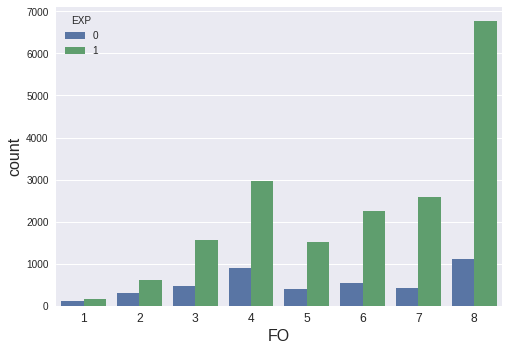

In [132]:
sns.countplot(x=df_regr_2['FO'], hue=df_regr_2['EXP'])

In [133]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(wd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, df, prob))

test Statistics: 488.5280110026998
degrees of freedom: 7
p-value: 2.344294514379501e-101



#**9.Выводы**

В процессе оценки данных по вакансиям, в сфере ИТ, представленным на рынке труда РФ были получены следующие результаты исследования:
- в рамках статистического анализа данных, отражающих особенности спроса на специалистов, были графически представлены особенности распределения спроса на специалистов в соответствии с городами размещения вакансий, федеральными округами: так наибольшее количество вакансий среди городов относится к Москве и Санкт-Петербургу, а также городам миллионникам;
- представленное выше распределение вакансий также характерно и для федеральных округов;
- была графически представлена структура вакансий специалистов в зависимости от опыта, минимум которого рассматривается со стороны работодателя: так больше всего спроса на специалистов, обладающих опытом от 1 года до 3-х лет;
- среди наиболее востребованных навыков для специалистов работодатели отмечали: работу в команде, GIT, SQL, Linux, 1C, грамотную речь и т.д.;
- в рамках исследования были проанализированы числовые данные: средняя ЗП специалистов, а также количество требуемых скиллов со стороны работодателей от потенциальных работников. ПО данным количественным показателям была проверена гипотеза о нормальности распределения данных величин, которая не подтвердилась в рамках теста Д’Агостино;
- в процессе работы были проверены гипотезы о наличии связи между уровнем средней заработной платы и следующими категориальными признаками: график работы, опыт работы, федеральным округом, где предлагается работа (наличие связи было подтверждено в рамках проверки гипотез);
- представленная выше проверка гипотез была осуществлена как по всей совокупности исследуемых данных, так и по совокупности данных, которые отражали вакансии в ИТ-сфере;
- в заключительной части работы были предприняты попытки построения регрессионной модели зависимости средней заработной платы в зависимости от федерального округа, где предлагалась работа, количества скиллов, а также опыта.
